
```
```
#  Análisis Exploratorio de Datos (EDA)
## Telco Customer Churn Dataset

**Autor:**  Díaz, Daiana - Schaltegger, Franco
**Universidad:** Universidad Tecnológica Nacional (UTN)


---

## Objetivo
Realizar un análisis exploratorio del dataset de Telco Churn para:
- Entender la estructura y calidad de los datos
- Identificar patrones en el comportamiento de los clientes
- Analizar las características asociadas al churn
- Preparar insights para el modelado predictivo


#Partes prácticas del trabajo a desarrollar:
Desarrollar en python un EDA (un análisis exploratorio sobre de el dataset en cuestión)
Desarrollar en python un pipeline de Machine Learning para predecir la variable Churn (si el cliente se va a ir de la compañía o no). Aplicar también algún método de la reducción de la dimensionalidad visto en clase y volver a predecir el problema en cuestión.
Redactar reporte técnico describiendo el trabajo.

Entrega del trabajo: Cada estudiante deberá crear una cuenta de github. Allí deberá tener un repositorio llamado “data_science_utn_clusterai2024_apellido” con los siguientes archivos subidos:

Un archivo jupyter notebook con el EDA (“clusterai_nombre_apellido_eda.ipynb”)

Un archivo jupyter notebook con la aplicación de modelos de machine learning (“clusterai_nombre_apellido_machine_learning.ipynb”)

Un archivo jupyter notebook con todas las manipulaciones que hicieron para la aplicación del modelo. Deben asegurarse que corra sin ningún inconveniente para que los profesores puedan correrlo desde sus computadoras.

Un archivo .pdf con el informe del trabajo “clusterai_reporte_apellido.pdf” de 4 hojas +- 1 hoja con las siguientes secciones: Introducción y objetivos, descripción del dataset, análisis exploratorio de datos, materiales y métodos (algoritmos utilizados), experimentos y resultados, discusión y conclusiones, referencias (aunque sea 3 papers y/o libros). Importante: las figuras deben ser originales por parte de los autores, no pueden copiarlas de internet.

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import io

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Google Colab
from google.colab import files

# Configuración
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(' Librerías importadas correctamente')

 Librerías importadas correctamente


In [2]:
# Cargar el dataset
print(" Selecciona el archivo telco_churn_clusterai.csv")
uploaded = files.upload()

for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]), index_col=0)
    print(f"\n Archivo cargado: {filename}")
    print(f"Dimensiones: {df.shape}")
    display(df.head())

 Selecciona el archivo telco_churn_clusterai.csv


Saving telco_churn_clusterai.csv to telco_churn_clusterai.csv

 Archivo cargado: telco_churn_clusterai.csv
Dimensiones: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,1.00,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.00,No,No,34.00,Yes,No,NaN,Yes,No,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0.00,No,No,2.00,NaN,No,NaN,Yes,NaN,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.00,No,No,NaN,No,NaN,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,NaN,NaN,2.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [3]:
# Información del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)

print(f"\n Estructura:")
print(f" Número de registros: {df.shape[0]:,}")
print(f" Número de variables: {df.shape[1]}")
print(f" Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n Estructura de los datos:")
df.info()

INFORMACIÓN GENERAL DEL DATASET

 Estructura:
 Número de registros: 7,043
 Número de variables: 21
 Memoria utilizada: 6.63 MB

 Estructura de los datos:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6127 non-null   object 
 2   SeniorCitizen     6127 non-null   float64
 3   Partner           6127 non-null   object 
 4   Dependents        6127 non-null   object 
 5   tenure            6127 non-null   float64
 6   PhoneService      6127 non-null   object 
 7   MultipleLines     6127 non-null   object 
 8   InternetService   6127 non-null   object 
 9   OnlineSecurity    6127 non-null   object 
 10  OnlineBackup      6127 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   

In [ ]:
print("\n Estadísticas descriptivas:")
df.describe()


 Estadísticas descriptivas:


,SeniorCitizen,tenure,MonthlyCharges
count,6127.00,6127.00,5846.00
mean,0.16,32.54,64.66
std,0.37,24.63,30.05
min,0.00,0.00,18.70
25%,0.00,9.00,35.40
50%,0.00,29.00,70.38
75%,0.00,56.00,89.69
max,1.00,72.00,118.75


In [4]:
print("\n🔢 Tipos de datos:")
print(df.dtypes.value_counts())


🔢 Tipos de datos:
object     18
float64     3
Name: count, dtype: int64


ANÁLISIS DE VALORES FALTANTES

 Variables con valores faltantes:


,Total_Missing,Percent_Missing
PaymentMethod,1197,17.00
MonthlyCharges,1197,17.00
Contract,1197,17.00
PaperlessBilling,1197,17.00
gender,916,13.01
SeniorCitizen,916,13.01
PhoneService,916,13.01
tenure,916,13.01
Dependents,916,13.01
Partner,916,13.01


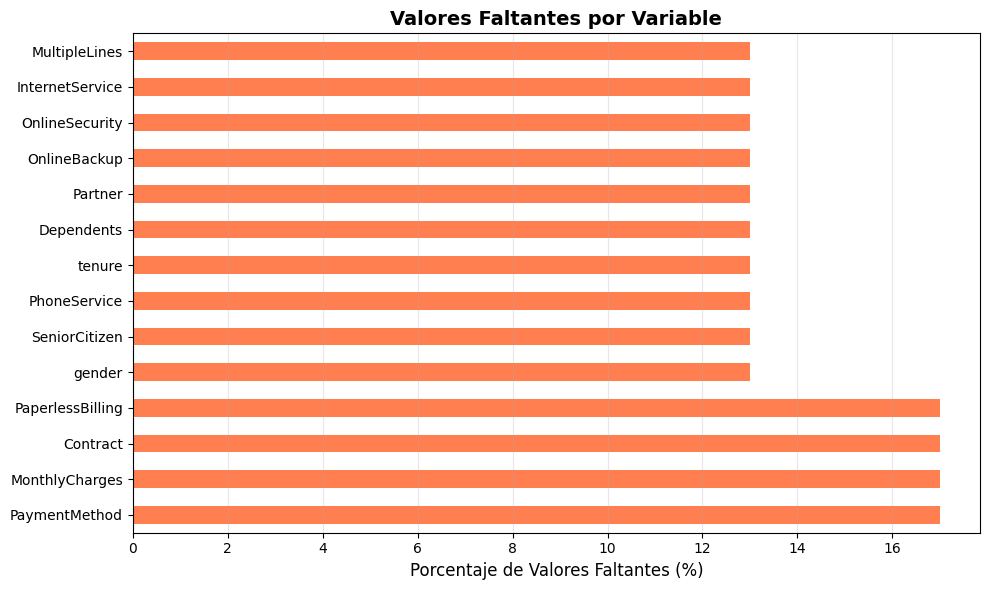


 Verificando strings vacíos...
 No hay strings vacíos


In [5]:
#Analisis de Valores Faltantes
print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

# Valores nulos
missing = pd.DataFrame({
    'Total_Missing': df.isnull().sum(),
    'Percent_Missing': (df.isnull().sum() / len(df)) * 100
})
missing = missing[missing['Total_Missing'] > 0].sort_values('Percent_Missing', ascending=False)

if len(missing) > 0:
    print("\n Variables con valores faltantes:")
    display(missing)

    # Visualizar
    fig, ax = plt.subplots(figsize=(10, 6))
    missing['Percent_Missing'].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
    ax.set_title('Valores Faltantes por Variable', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\n No hay valores faltantes (NaN)")

# Verificar strings vacíos
print("\n Verificando strings vacíos...")
empty_strings = {}
for col in df.select_dtypes(include=['object']).columns:
    empty_count = (df[col] == '').sum()
    if empty_count > 0:
        empty_strings[col] = {'Count': empty_count, 'Percentage': f"{(empty_count/len(df))*100:.2f}%"}

if empty_strings:
    print("\n Variables con strings vacíos:")
    display(pd.DataFrame(empty_strings).T)
else:
    print(" No hay strings vacíos")

ANÁLISIS DE LA VARIABLE OBJETIVO: CHURN

Distribución:
   • No: 5,174 clientes (73.46%)
   • Yes: 1,869 clientes (26.54%)


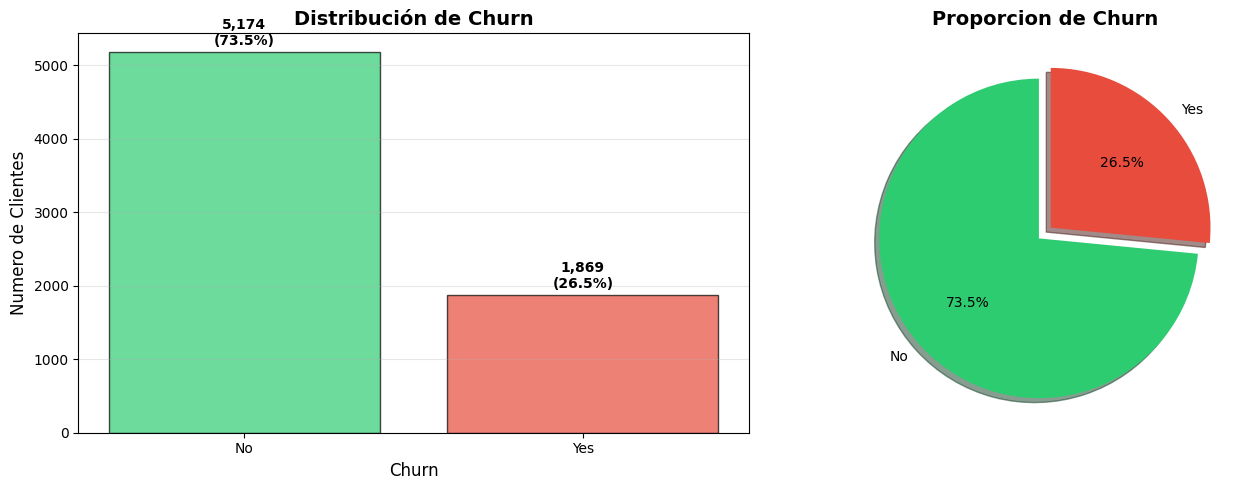


 Balance de clases: 2.77:1
  Dataset relativamente balanceado


In [6]:
#Análisis de la Variable Objetivo (Churn)
print("=" * 80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO: CHURN")
print("=" * 80)

# Distribución de Churn
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print(f"\nDistribución:")
for val, count in churn_counts.items():
    pct = churn_pct[val]
    print(f"   • {val}: {count:,} clientes ({pct:.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Churn', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Numero de Clientes', fontsize=12)
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(churn_counts.items()):
    axes[0].text(i, val + 100, f'{val:,}\n({churn_pct[idx]:.1f}%)', ha='center', fontweight='bold')

# Gráfico de torta
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=[0.05, 0.05], shadow=True)
axes[1].set_title('Proporcion de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Balance de clases
ratio = churn_counts.max() / churn_counts.min()
print(f"\n Balance de clases: {ratio:.2f}:1")
if ratio > 3:
    print("  Dataset desbalanceado - considerar técnicas de balanceo")
else:
    print("  Dataset relativamente balanceado")

In [7]:
#Analisis de variables numericas
print("=" * 80)
print("ANÁLISIS DE VARIABLES NUMÉRICAS")
print("=" * 80)

# Identificar variables numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n Variables numéricas encontradas: {len(numerical_cols)}")
print(f"   {numerical_cols}")

print("\n Estadísticas descriptivas detalladas:")
print("-" * 80)
stats_df = df[numerical_cols].describe().T
stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['cv'] = (stats_df['std'] / stats_df['mean']) * 100  # Coeficiente de variación
display(stats_df)

ANÁLISIS DE VARIABLES NUMÉRICAS

 Variables numéricas encontradas: 3
   ['SeniorCitizen', 'tenure', 'MonthlyCharges']

 Estadísticas descriptivas detalladas:
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,range,cv
SeniorCitizen,6127.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00,1.00,227.81
tenure,6127.00,32.54,24.63,0.00,9.00,29.00,56.00,72.00,72.00,75.69
MonthlyCharges,5846.00,64.66,30.05,18.70,35.40,70.38,89.69,118.75,100.05,46.47


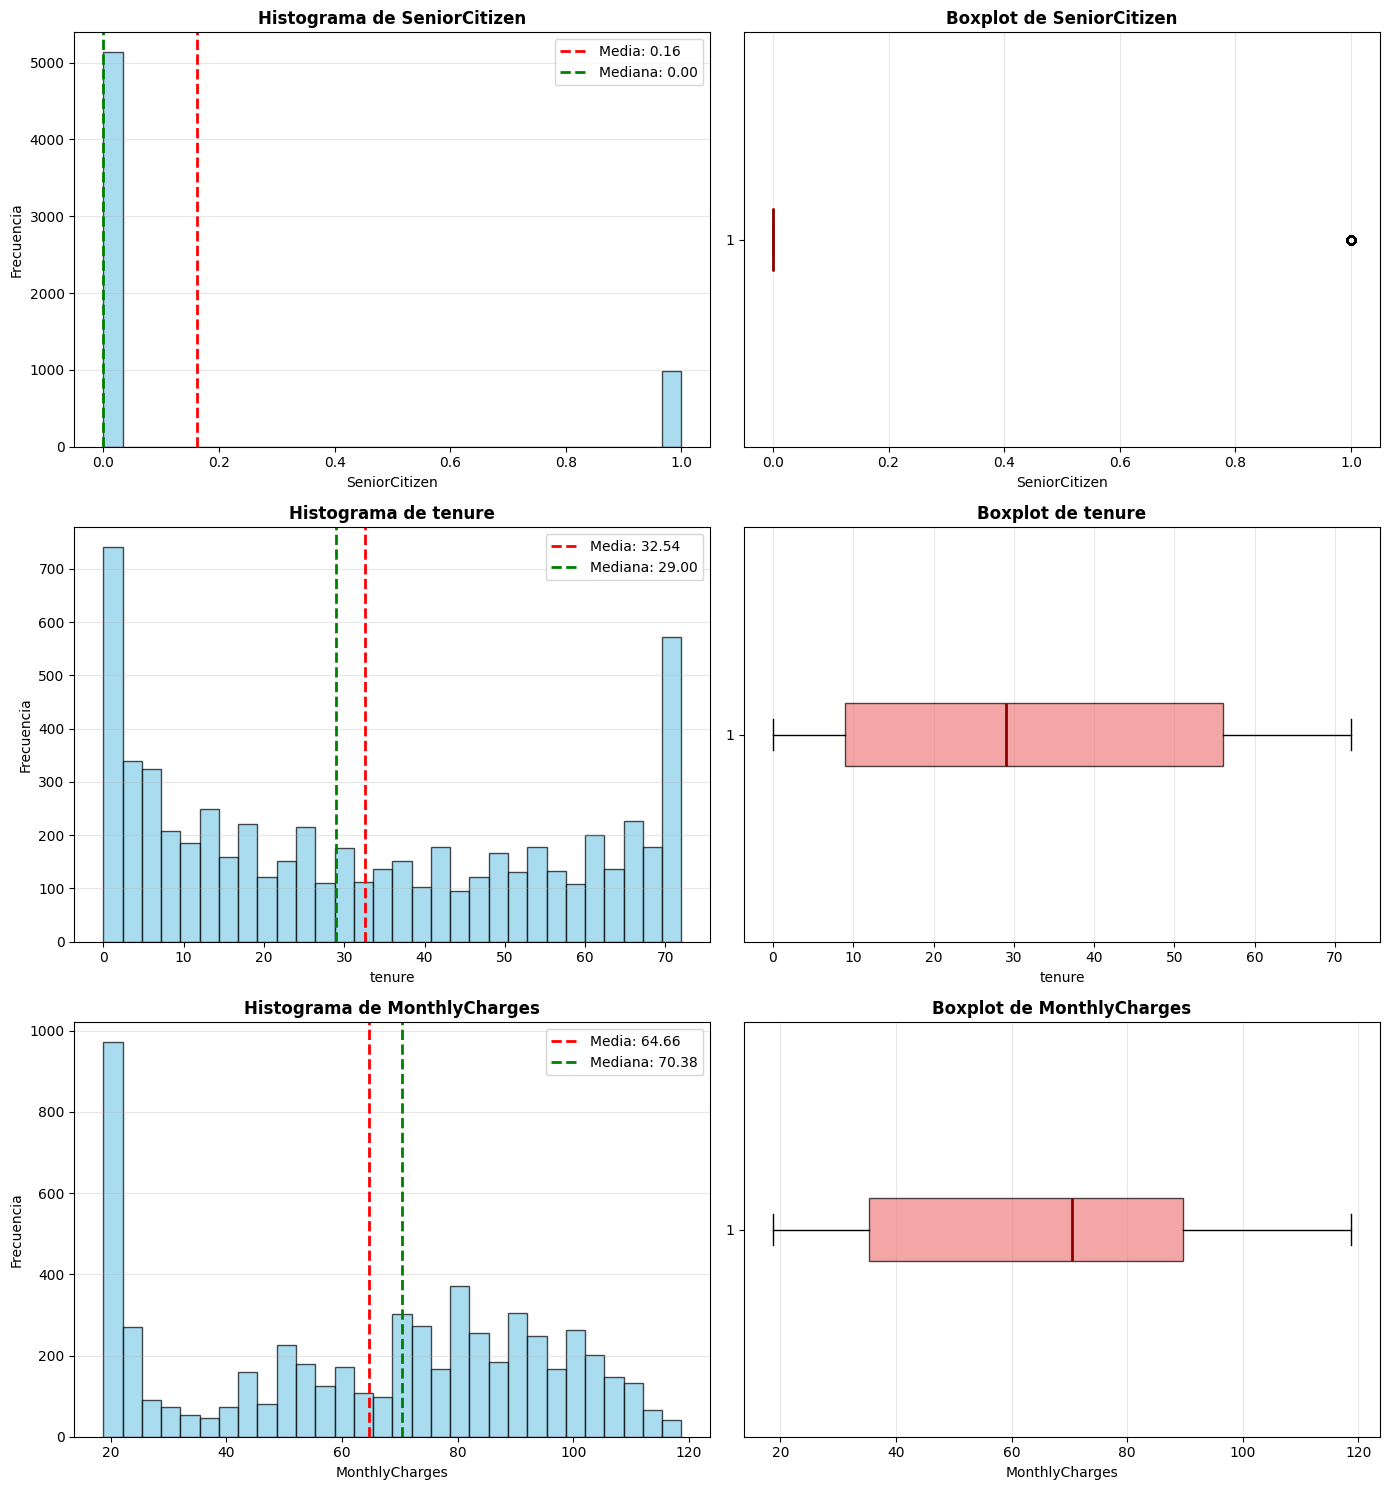

In [8]:
#Distribucion de Variables Numericas - Histogramas
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, 5*len(numerical_cols)))

if len(numerical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols):
    # Histograma
    axes[idx, 0].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'Histograma de {col}', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel(col, fontsize=10)
    axes[idx, 0].set_ylabel('Frecuencia', fontsize=10)
    axes[idx, 0].grid(axis='y', alpha=0.3)

    # Agregar estadísticas
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx, 0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    axes[idx, 0].legend()

    # Boxplot
    axes[idx, 1].boxplot(df[col].dropna(), vert=False, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2))
    axes[idx, 1].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel(col, fontsize=10)
    axes[idx, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
#Test de Normalidad
print("\n Test de Normalidad (Shapiro-Wilk):")
print("-" * 80)
print("H0: Los datos siguen una distribución normal")
print("Si p-value < 0.05, rechazamos H0 (no es normal)\n")

for col in numerical_cols:
    # Tomar una muestra si el dataset es muy grande
    sample_data = df[col].dropna().sample(min(5000, len(df[col].dropna())), random_state=42)
    stat, p_value = stats.shapiro(sample_data)

    is_normal = " Normal" if p_value > 0.05 else " No Normal"
    print(f"{col}:")
    print(f"  Estadístico: {stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Resultado: {is_normal}\n")


 Test de Normalidad (Shapiro-Wilk):
--------------------------------------------------------------------------------
H0: Los datos siguen una distribución normal
Si p-value < 0.05, rechazamos H0 (no es normal)

SeniorCitizen:
  Estadístico: 0.4371
  P-value: 9.9072e-83
  Resultado:  No Normal

tenure:
  Estadístico: 0.9019
  P-value: 6.9257e-49
  Resultado:  No Normal

MonthlyCharges:
  Estadístico: 0.9195
  P-value: 1.2675e-45
  Resultado:  No Normal



In [10]:
#Deteccion de Outliers
print("=" * 80)
print("DETECCION DE OUTLIERS (Método IQR)")
print("=" * 80)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\n Análisis de outliers por variable:\n")

outliers_summary = []

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df)) * 100

    outliers_summary.append({
        'Variable': col,
        'N_Outliers': n_outliers,
        'Percentage': f'{pct_outliers:.2f}%',
        'Lower_Bound': f'{lower:.2f}',
        'Upper_Bound': f'{upper:.2f}'
    })

    print(f"{col}:")
    print(f" Límite inferior: {lower:.2f}")
    print(f" Límite superior: {upper:.2f}")
    print(f" Outliers detectados: {n_outliers} ({pct_outliers:.2f}%)\n")

outliers_df = pd.DataFrame(outliers_summary)
display(outliers_df)

DETECCION DE OUTLIERS (Método IQR)

 Análisis de outliers por variable:

SeniorCitizen:
 Límite inferior: 0.00
 Límite superior: 0.00
 Outliers detectados: 990 (14.06%)

tenure:
 Límite inferior: -61.50
 Límite superior: 126.50
 Outliers detectados: 0 (0.00%)

MonthlyCharges:
 Límite inferior: -46.03
 Límite superior: 171.12
 Outliers detectados: 0 (0.00%)



,Variable,N_Outliers,Percentage,Lower_Bound,Upper_Bound
0,SeniorCitizen,990,14.06%,0.00,0.00
1,tenure,0,0.00%,-61.50,126.50
2,MonthlyCharges,0,0.00%,-46.03,171.12


ANÁLISIS BIVARIADO: CHURN vs VARIABLES NUMÉRICAS


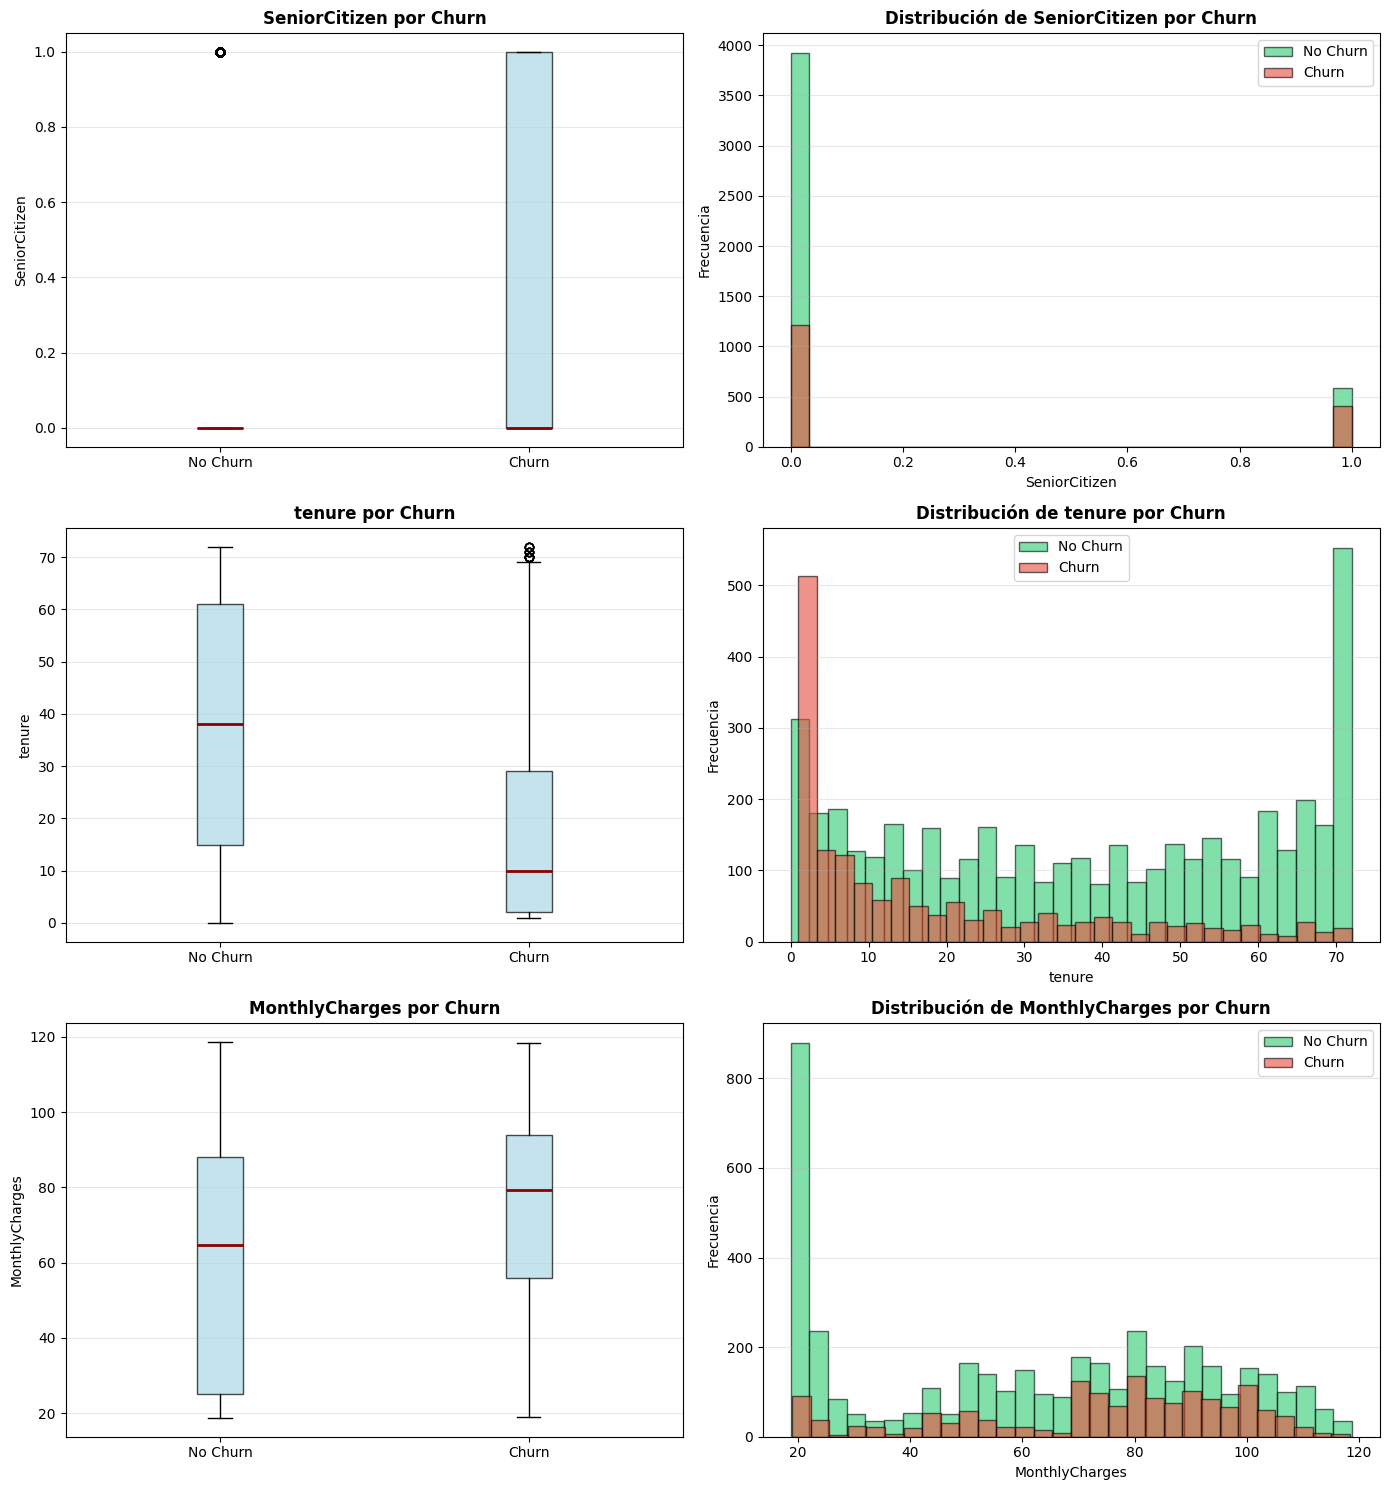


 Estadísticas comparativas por Churn:


SeniorCitizen:
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,4511.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
Yes,1616.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00



tenure:
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,4490.00,37.83,24.19,0.00,15.00,38.00,61.00,72.00
Yes,1637.00,18.02,19.46,1.00,2.00,10.00,29.00,72.00



MonthlyCharges:
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,4302.00,61.38,31.05,18.70,25.15,64.55,88.09,118.75
Yes,1544.00,73.79,24.88,18.95,55.80,79.40,93.85,118.35


In [11]:
#Analisis Bivariado - Churn vs Variables Numericas
print("=" * 80)
print("ANÁLISIS BIVARIADO: CHURN vs VARIABLES NUMÉRICAS")
print("=" * 80)

# Comparación de distribuciones
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, 5*len(numerical_cols)))

if len(numerical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols):
    # Boxplot comparativo
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no = df[df['Churn'] == 'No'][col].dropna()

    axes[idx, 0].boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'],
                         patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2))
    axes[idx, 0].set_title(f'{col} por Churn', fontsize=12, fontweight='bold')
    axes[idx, 0].set_ylabel(col, fontsize=10)
    axes[idx, 0].grid(axis='y', alpha=0.3)

    # Histograma comparativo
    axes[idx, 1].hist(churn_no, bins=30, alpha=0.6, label='No Churn', color='#2ecc71', edgecolor='black')
    axes[idx, 1].hist(churn_yes, bins=30, alpha=0.6, label='Churn', color='#e74c3c', edgecolor='black')
    axes[idx, 1].set_title(f'Distribución de {col} por Churn', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel(col, fontsize=10)
    axes[idx, 1].set_ylabel('Frecuencia', fontsize=10)
    axes[idx, 1].legend()
    axes[idx, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas por grupo
print("\n Estadísticas comparativas por Churn:\n")
for col in numerical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    stats_by_churn = df.groupby('Churn')[col].describe()
    display(stats_by_churn)

In [12]:
#Test Estadisticos para Variables Numericas
print("\n Test de Mann-Whitney U (Variables Numéricas vs Churn):")
print("-" * 80)
print("H0: Las distribuciones son iguales entre grupos")
print("Si p-value < 0.05, hay diferencia significativa\n")

for col in numerical_cols:
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no = df[df['Churn'] == 'No'][col].dropna()

    stat, p_value = stats.mannwhitneyu(churn_no, churn_yes, alternative='two-sided')

    is_significant = "Diferencia significativa" if p_value < 0.05 else "❌ No hay diferencia significativa"

    print(f"{col}:")
    print(f"  Estadístico U: {stat:.2f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Resultado: {is_significant}\n")



 Test de Mann-Whitney U (Variables Numéricas vs Churn):
--------------------------------------------------------------------------------
H0: Las distribuciones son iguales entre grupos
Si p-value < 0.05, hay diferencia significativa

SeniorCitizen:
  Estadístico U: 3197963.50
  P-value: 1.4799e-30
  Resultado: Diferencia significativa

tenure:
  Estadístico U: 5444428.50
  P-value: 1.3988e-183
  Resultado: Diferencia significativa

MonthlyCharges:
  Estadístico U: 2567073.50
  P-value: 4.2241e-40
  Resultado: Diferencia significativa



ANÁLISIS DE CORRELACIONES


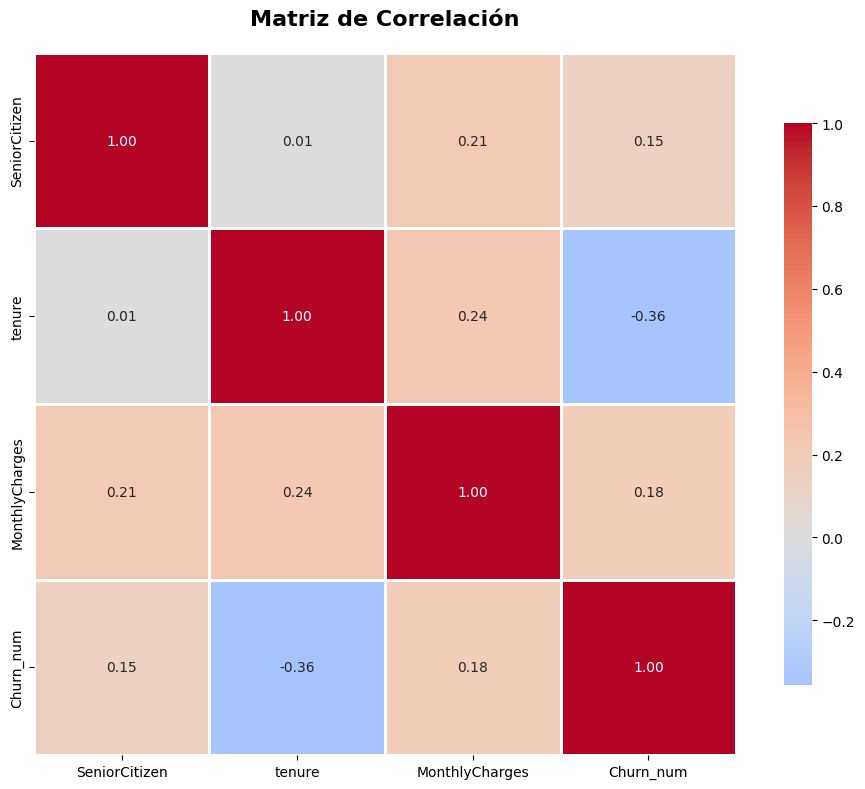


 Correlaciones con Churn (ordenadas por magnitud):

   tenure: -0.356 (negativa, moderada)
   MonthlyCharges: 0.182 (positiva, débil)
   SeniorCitizen: 0.147 (positiva, débil)


In [13]:
#Matriz de Correlacion
print("=" * 80)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 80)

# Preparar datos para correlación
df_corr = df.copy()

# Convertir Churn a numérico
df_corr['Churn_num'] = (df_corr['Churn'] == 'Yes').astype(int)

# Seleccionar solo variables numéricas
numeric_cols_with_churn = numerical_cols + ['Churn_num']
corr_matrix = df_corr[numeric_cols_with_churn].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con Churn
print("\n Correlaciones con Churn (ordenadas por magnitud):\n")
churn_correlations = corr_matrix['Churn_num'].drop('Churn_num').sort_values(key=abs, ascending=False)
for var, corr in churn_correlations.items():
    direction = "positiva" if corr > 0 else "negativa"
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
    print(f"   {var}: {corr:.3f} ({direction}, {strength})")

In [14]:
#Conclusiones del EDA
print("=" * 80)
print("CONCLUSIONES DEL ANÁLISIS EXPLORATORIO")
print("=" * 80)

print(f"""
 RESUMEN DEL DATASET:
   Total de clientes: {df.shape[0]:,}
   Variables analizadas: {df.shape[1]}
   Tasa general de churn: {(df['Churn'] == 'Yes').sum() / len(df) * 100:.2f}%

 HALLAZGOS CLAVE:
   1. CALIDAD DE DATOS:
       Valores faltantes detectados: {df.isnull().sum().sum()}
       Variables con datos limpios: {(df.isnull().sum() == 0).sum()}

   2. BALANCE DE CLASES:
       Dataset {'desbalanceado' if (df['Churn'].value_counts().max() / df['Churn'].value_counts().min()) > 3 else 'relativamente balanceado'}
       Ratio: {df['Churn'].value_counts().max() / df['Churn'].value_counts().min():.2f}:1

   3. VARIABLES PREDICTORAS:
       Variables numéricas: {len(numerical_cols)}
       Correlaciones significativas detectadas

 CONSIDERACIONES PARA EL MODELADO:
    Preprocesamiento necesario: encoding de variables categóricas
    Escalado recomendado para variables numéricas
    Evaluar técnicas de balanceo si es necesario
    Considerar reducción de dimensionalidad (PCA)

 PRÓXIMOS PASOS:
   1. Preprocesamiento de datos
   2. Feature engineering
   3. Selección de características
   4. Entrenamiento de modelos
   5. Evaluación y optimización
""")

CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

 RESUMEN DEL DATASET:
   Total de clientes: 7,043
   Variables analizadas: 21
   Tasa general de churn: 26.54%

 HALLAZGOS CLAVE:
   1. CALIDAD DE DATOS:
       Valores faltantes detectados: 13948
       Variables con datos limpios: 7

   2. BALANCE DE CLASES:
       Dataset relativamente balanceado
       Ratio: 2.77:1

   3. VARIABLES PREDICTORAS:
       Variables numéricas: 3
       Correlaciones significativas detectadas

 CONSIDERACIONES PARA EL MODELADO:
    Preprocesamiento necesario: encoding de variables categóricas
    Escalado recomendado para variables numéricas
    Evaluar técnicas de balanceo si es necesario
    Considerar reducción de dimensionalidad (PCA)

 PRÓXIMOS PASOS:
   1. Preprocesamiento de datos
   2. Feature engineering
   3. Selección de características
   4. Entrenamiento de modelos
   5. Evaluación y optimización




```
```
#  Pipeline de Machine Learning
## Predicción de Churn en Telco

**Autor:**  Díaz, Daiana - Schaltegger, Franco
**Universidad:** Universidad Tecnológica Nacional (UTN)

---

## Objetivo
Desarrollar un pipeline completo de Machine Learning para predecir el churn de clientes:
- Preprocesamiento de datos
- Entrenamiento de múltiples modelos
- Aplicación de reducción de dimensionalidad (PCA)
- Comparación de resultados
- Selección del mejor modelo

In [15]:
# Librerías básicas
import pandas as pd
import numpy as np
import io

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab
from google.colab import files

# Scikit-learn - Preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Scikit-learn - Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Scikit-learn - Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Scikit-learn - Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# Desbalanceo (opcional)
from imblearn.over_sampling import SMOTE

# Configuración
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline
pd.set_option('display.max_columns', None)

print(' Librerías importadas correctamente')

 Librerías importadas correctamente


In [16]:
# Cargar el dataset
print(" Selecciona el archivo telco_churn_clusterai.csv")
uploaded = files.upload()

for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]), index_col=0)
    print(f"\n Archivo cargado: {filename}")
    print(f"Dimensiones: {df.shape}")
    display(df.head())

 Selecciona el archivo telco_churn_clusterai.csv


Saving telco_churn_clusterai.csv to telco_churn_clusterai (1).csv

 Archivo cargado: telco_churn_clusterai (1).csv
Dimensiones: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,1.00,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.00,No,No,34.00,Yes,No,NaN,Yes,No,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0.00,No,No,2.00,NaN,No,NaN,Yes,NaN,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.00,No,No,NaN,No,NaN,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,NaN,NaN,2.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [17]:
print("=" * 80)
print("ANÁLISIS INICIAL DE DATOS")
print("=" * 80)

print(f"\n Dimensiones: {df.shape}")
print(f"\n Información del dataset:")
df.info()

print(f"\n Distribución de la variable objetivo (Churn):")
print(df['Churn'].value_counts())
print(f"\nTasa de churn: {(df['Churn'] == 'Yes').sum() / len(df) * 100:.2f}%")

ANÁLISIS INICIAL DE DATOS

 Dimensiones: (7043, 21)

 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6127 non-null   object 
 2   SeniorCitizen     6127 non-null   float64
 3   Partner           6127 non-null   object 
 4   Dependents        6127 non-null   object 
 5   tenure            6127 non-null   float64
 6   PhoneService      6127 non-null   object 
 7   MultipleLines     6127 non-null   object 
 8   InternetService   6127 non-null   object 
 9   OnlineSecurity    6127 non-null   object 
 10  OnlineBackup      6127 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract       

In [18]:
#Preprocesamiento - Manejo de Valores Faltantes
print("=" * 80)
print("PREPROCESAMIENTO - MANEJO DE VALORES FALTANTES")
print("=" * 80)

# Verifica valores faltantes
print("\n Valores faltantes por columna:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print(" No hay valores faltantes (NaN)")

# Verifica strings vacíos en variables categóricas
print("\n Verificando strings vacíos...")
for col in df.select_dtypes(include=['object']).columns:
    empty_count = (df[col] == '').sum()
    if empty_count > 0:
        print(f" {col}: {empty_count} valores vacíos ({empty_count/len(df)*100:.2f}%)")
        # Reemplazar strings vacíos con la moda
        mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
        df[col] = df[col].replace('', mode_val)
        print(f"    Reemplazados con: {mode_val}")

# Verifica y maneja valores faltantes en variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f" {col}: Valores faltantes imputados con mediana ({median_val:.2f})")

print("\n Preprocesamiento de valores faltantes completado")

PREPROCESAMIENTO - MANEJO DE VALORES FALTANTES

 Valores faltantes por columna:


,Missing,Percentage
PaymentMethod,1197,17.00
MonthlyCharges,1197,17.00
Contract,1197,17.00
PaperlessBilling,1197,17.00
gender,916,13.01
SeniorCitizen,916,13.01
PhoneService,916,13.01
tenure,916,13.01
Dependents,916,13.01
Partner,916,13.01



 Verificando strings vacíos...
 SeniorCitizen: Valores faltantes imputados con mediana (0.00)
 tenure: Valores faltantes imputados con mediana (29.00)
 MonthlyCharges: Valores faltantes imputados con mediana (70.38)

 Preprocesamiento de valores faltantes completado


In [19]:
#Preprocesamiento - Encoding de Variables Categoricas
print("=" * 80)
print("PREPROCESAMIENTO - ENCODING DE VARIABLES CATEGÓRICAS")
print("=" * 80)

# Crear copia del dataset
df_encoded = df.copy()

# Eliminar customerID si existe
if 'customerID' in df_encoded.columns:
    df_encoded = df_encoded.drop('customerID', axis=1)
    print(" Columna 'customerID' eliminada")

# Separar variable objetivo
y = df_encoded['Churn'].copy()
X = df_encoded.drop('Churn', axis=1)

print(f"\n Variables predictoras: {X.shape[1]}")
print(f" Variable objetivo: {y.name}")

# Encoding de la variable objetivo
print("\n Encoding de variable objetivo:")
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f"   'No'  {le_target.transform(['No'])[0]}")
print(f"   'Yes'  {le_target.transform(['Yes'])[0]}")

# Identificar variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n Variables categóricas a codificar: {len(categorical_cols)}")
print(f" Variables numéricas: {len(numerical_cols)}")

# Label Encoding para variables categóricas
label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  {col}: {len(le.classes_)} categorías codificadas")

print("\n Encoding completado")
print(f" Dataset final: {X_encoded.shape}")

PREPROCESAMIENTO - ENCODING DE VARIABLES CATEGÓRICAS
 Columna 'customerID' eliminada

 Variables predictoras: 19
 Variable objetivo: Churn

 Encoding de variable objetivo:
   'No'  0
   'Yes'  1

 Variables categóricas a codificar: 16
 Variables numéricas: 3
  gender: 3 categorías codificadas
  Partner: 3 categorías codificadas
  Dependents: 3 categorías codificadas
  PhoneService: 3 categorías codificadas
  MultipleLines: 4 categorías codificadas
  InternetService: 4 categorías codificadas
  OnlineSecurity: 4 categorías codificadas
  OnlineBackup: 4 categorías codificadas
  DeviceProtection: 3 categorías codificadas
  TechSupport: 3 categorías codificadas
  StreamingTV: 3 categorías codificadas
  StreamingMovies: 3 categorías codificadas
  Contract: 4 categorías codificadas
  PaperlessBilling: 3 categorías codificadas
  PaymentMethod: 5 categorías codificadas
  TotalCharges: 6531 categorías codificadas

 Encoding completado
 Dataset final: (7043, 19)


In [20]:
#Division de Datos - Train/Test Split
print("=" * 80)
print("DIVISIÓN DE DATOS - TRAIN/TEST SPLIT")
print("=" * 80)

# Dividir datos (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"\n Dimensiones de los conjuntos:")
print(f"   Training set:   {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"   Features:       {X_train.shape[1]}")

print(f"\n Distribución de Churn en Training:")
unique, counts = np.unique(y_train, return_counts=True)
for val, count in zip(unique, counts):
    label = 'No' if val == 0 else 'Yes'
    print(f"  {label}: {count:,} ({count/len(y_train)*100:.1f}%)")

print(f"\n Distribución de Churn en Test:")
unique, counts = np.unique(y_test, return_counts=True)
for val, count in zip(unique, counts):
    label = 'No' if val == 0 else 'Yes'
    print(f" {label}: {count:,} ({count/len(y_test)*100:.1f}%)")

DIVISIÓN DE DATOS - TRAIN/TEST SPLIT

 Dimensiones de los conjuntos:
   Training set:   5,634 muestras (80.0%)
   Test set:       1,409 muestras (20.0%)
   Features:       19

 Distribución de Churn en Training:
  No: 4,139 (73.5%)
  Yes: 1,495 (26.5%)

 Distribución de Churn en Test:
 No: 1,035 (73.5%)
 Yes: 374 (26.5%)


In [21]:
#Escalado de Caracteristicas
print("=" * 80)
print("ESCALADO DE CARACTERÍSTICAS")
print("=" * 80)

# Aplicar StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Escalado aplicado con StandardScaler")
print(f"\n Estadísticas del Training Set escalado:")
print(f"    Media: {X_train_scaled.mean():.4f}")
print(f"    Desviación estándar: {X_train_scaled.std():.4f}")
print(f"    Mínimo: {X_train_scaled.min():.4f}")
print(f"    Máximo: {X_train_scaled.max():.4f}")

ESCALADO DE CARACTERÍSTICAS
 Escalado aplicado con StandardScaler

 Estadísticas del Training Set escalado:
    Media: -0.0000
    Desviación estándar: 1.0000
    Mínimo: -2.2444
    Máximo: 2.4635


In [22]:
#Defino los modelos
print("=" * 80)
print("DEFINICIÓN DE MODELOS DE MACHINE LEARNING")
print("=" * 80)

# Diccionario de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

print(f" Modelos a entrenar: {len(models)}")
for name in models.keys():
    print(f" {name}")

DEFINICIÓN DE MODELOS DE MACHINE LEARNING
 Modelos a entrenar: 6
 Logistic Regression
 Decision Tree
 Random Forest
 Gradient Boosting
 SVM
 Naive Bayes


In [23]:
#Balanceo de Clases con SMOTE
print("=" * 80)
print("BALANCEO DE CLASES CON SMOTE")
print("=" * 80)

# Verificar si es necesario el balanceo
unique, counts = np.unique(y_train, return_counts=True)
ratio = counts.max() / counts.min()

print(f" Ratio de desbalanceo: {ratio:.2f}:1")

if ratio > 1.5:
    print(" Dataset desbalanceado. Aplicando SMOTE...")

    # Aplicar SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

    print(f"\n SMOTE aplicado:")
    print(f"   Antes: {X_train_scaled.shape[0]:,} muestras")
    print(f"   Después: {X_train_balanced.shape[0]:,} muestras")

    print(f"\n Nueva distribución:")
    unique, counts = np.unique(y_train_balanced, return_counts=True)
    for val, count in zip(unique, counts):
        label = 'No' if val == 0 else 'Yes'
        print(f"  {label}: {count:,} ({count/len(y_train_balanced)*100:.1f}%)")

    # Usar datos balanceados
    X_train_final = X_train_balanced
    y_train_final = y_train_balanced
else:
    print(" Dataset relativamente balanceado. No se aplica SMOTE.")
    X_train_final = X_train_scaled
    y_train_final = y_train

BALANCEO DE CLASES CON SMOTE
 Ratio de desbalanceo: 2.77:1
 Dataset desbalanceado. Aplicando SMOTE...

 SMOTE aplicado:
   Antes: 5,634 muestras
   Después: 8,278 muestras

 Nueva distribución:
  No: 4,139 (50.0%)
  Yes: 4,139 (50.0%)


In [24]:
#Definir modelos
print("=" * 80)
print("DEFINICIÓN DE MODELOS DE MACHINE LEARNING")
print("=" * 80)

# Diccionario de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

print(f" Modelos a entrenar: {len(models)}")
for name in models.keys():
    print(f"  {name}")

DEFINICIÓN DE MODELOS DE MACHINE LEARNING
 Modelos a entrenar: 6
  Logistic Regression
  Decision Tree
  Random Forest
  Gradient Boosting
  SVM
  Naive Bayes


In [25]:
#Entrenamiento y evaluacion de Modelos (SIN PCA)
print("=" * 80)
print("ENTRENAMIENTO Y EVALUACIÓN - SIN REDUCCIÓN DE DIMENSIONALIDAD")
print("=" * 80)

# Diccionario para almacenar resultados
results_without_pca = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f" Entrenando: {name}")
    print(f"{'='*60}")

    # Entrenar modelo
    model.fit(X_train_final, y_train_final)

    # Predicciones
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Guardar resultados
    results_without_pca[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Model': model,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

    # Mostrar resultados
    print(f" Accuracy:  {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall:    {recall:.4f}")
    print(f" F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f" ROC-AUC:   {roc_auc:.4f}")

print("\n" + "="*80)
print(" TODOS LOS MODELOS ENTRENADOS (SIN PCA)")
print("="*80)

ENTRENAMIENTO Y EVALUACIÓN - SIN REDUCCIÓN DE DIMENSIONALIDAD

 Entrenando: Logistic Regression
 Accuracy:  0.7246
 Precision: 0.4878
 Recall:    0.7513
 F1-Score:  0.5916
 ROC-AUC:   0.8073

 Entrenando: Decision Tree
 Accuracy:  0.7090
 Precision: 0.4577
 Recall:    0.5214
 F1-Score:  0.4875
 ROC-AUC:   0.6491

 Entrenando: Random Forest
 Accuracy:  0.7693
 Precision: 0.5702
 Recall:    0.5321
 F1-Score:  0.5505
 ROC-AUC:   0.8086

 Entrenando: Gradient Boosting
 Accuracy:  0.7700
 Precision: 0.5625
 Recall:    0.6016
 F1-Score:  0.5814
 ROC-AUC:   0.8216

 Entrenando: SVM
 Accuracy:  0.7282
 Precision: 0.4914
 Recall:    0.6872
 F1-Score:  0.5730
 ROC-AUC:   0.7936

 Entrenando: Naive Bayes
 Accuracy:  0.7275
 Precision: 0.4908
 Recall:    0.7112
 F1-Score:  0.5808
 ROC-AUC:   0.7897

 TODOS LOS MODELOS ENTRENADOS (SIN PCA)



 TABLA COMPARATIVA DE MODELOS (SIN PCA)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.724627,0.487847,0.751337,0.591579,0.807338
Gradient Boosting,0.770050,0.562500,0.601604,0.581395,0.821640
Naive Bayes,0.727466,0.490775,0.711230,0.580786,0.789725
SVM,0.728176,0.491396,0.687166,0.573021,0.793571
Random Forest,0.769340,0.570201,0.532086,0.550484,0.808572
Decision Tree,0.709013,0.457746,0.521390,0.487500,0.649101


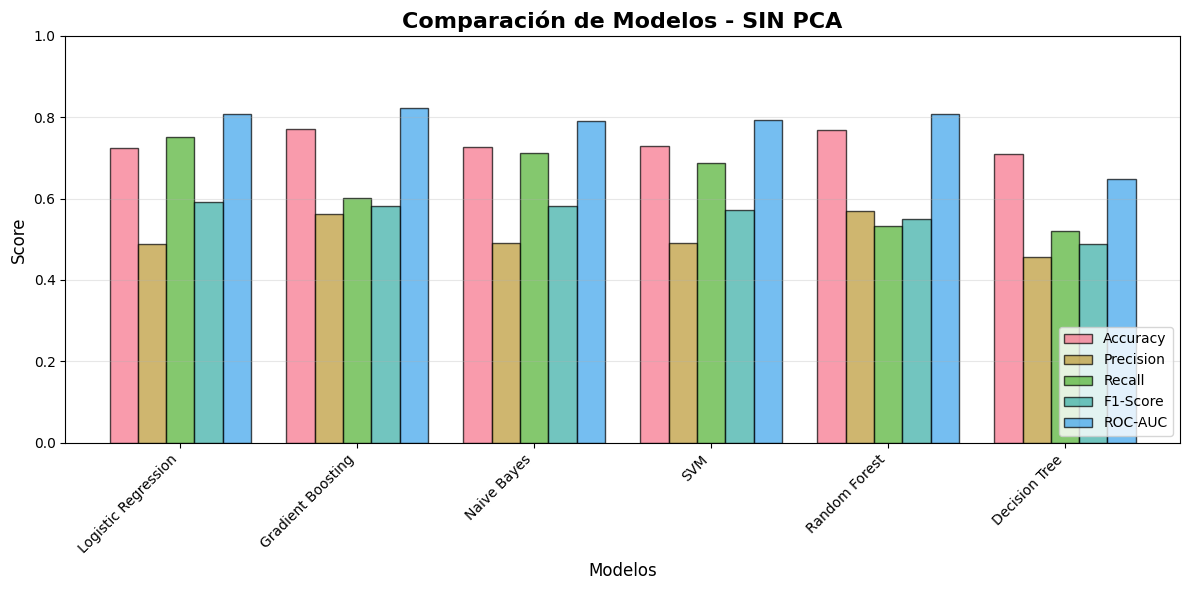

In [26]:
#Tabla Comparativa de Resultados (SIN PCA)
# Creo DataFrame con resultados
results_df_no_pca = pd.DataFrame(results_without_pca).T
results_df_no_pca = results_df_no_pca[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]
results_df_no_pca = results_df_no_pca.sort_values('F1-Score', ascending=False)

print("\n TABLA COMPARATIVA DE MODELOS (SIN PCA)")
print("="*80)
display(results_df_no_pca.style.highlight_max(axis=0, props='background-color: lightgreen;'))

# Visualizacion
fig, ax = plt.subplots(figsize=(12, 6))
results_df_no_pca[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind='bar', ax=ax, width=0.8, edgecolor='black', alpha=0.7
)
ax.set_title('Comparación de Modelos - SIN PCA', fontsize=16, fontweight='bold')
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Modelos', fontsize=12)
ax.set_ylim([0, 1])
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

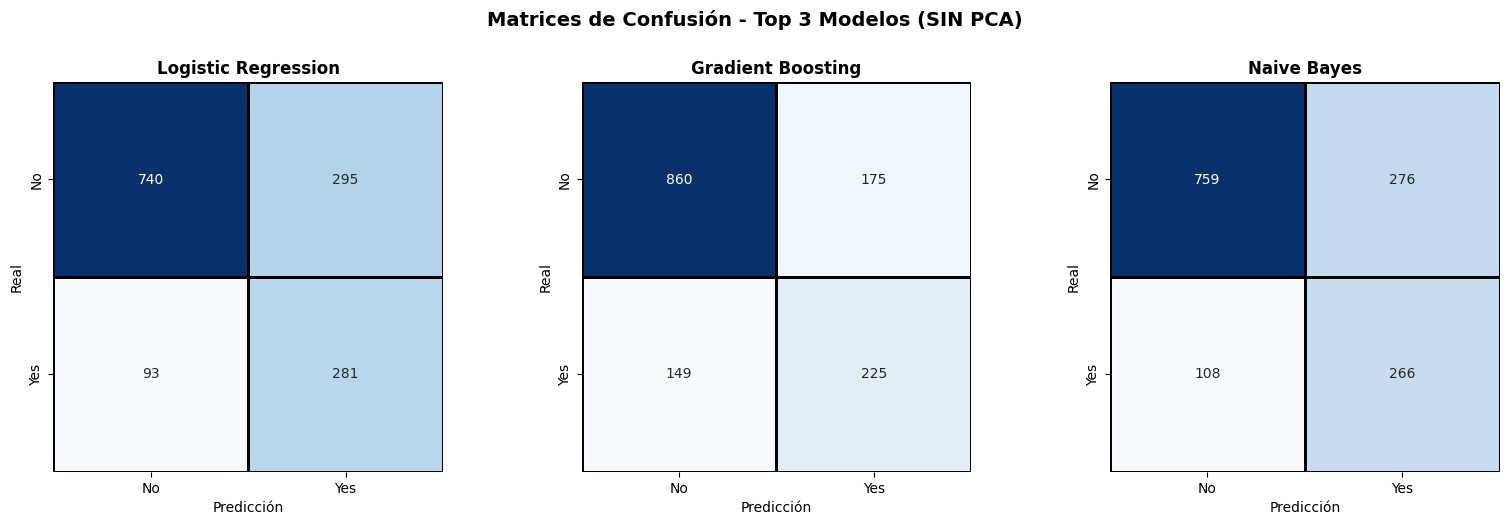

In [27]:
#Matrices de confusion (SIN PCA)
# Visualizar matrices de confusion para los mejores 3 modelos
top_3_models = results_df_no_pca.head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, model_name in enumerate(top_3_models):
    y_pred = results_without_pca[model_name]['Predictions']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar=False, square=True, linewidths=1, linecolor='black')
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Real', fontsize=10)
    axes[idx].set_xlabel('Predicción', fontsize=10)
    axes[idx].set_xticklabels(['No', 'Yes'])
    axes[idx].set_yticklabels(['No', 'Yes'])

plt.suptitle('Matrices de Confusión - Top 3 Modelos (SIN PCA)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

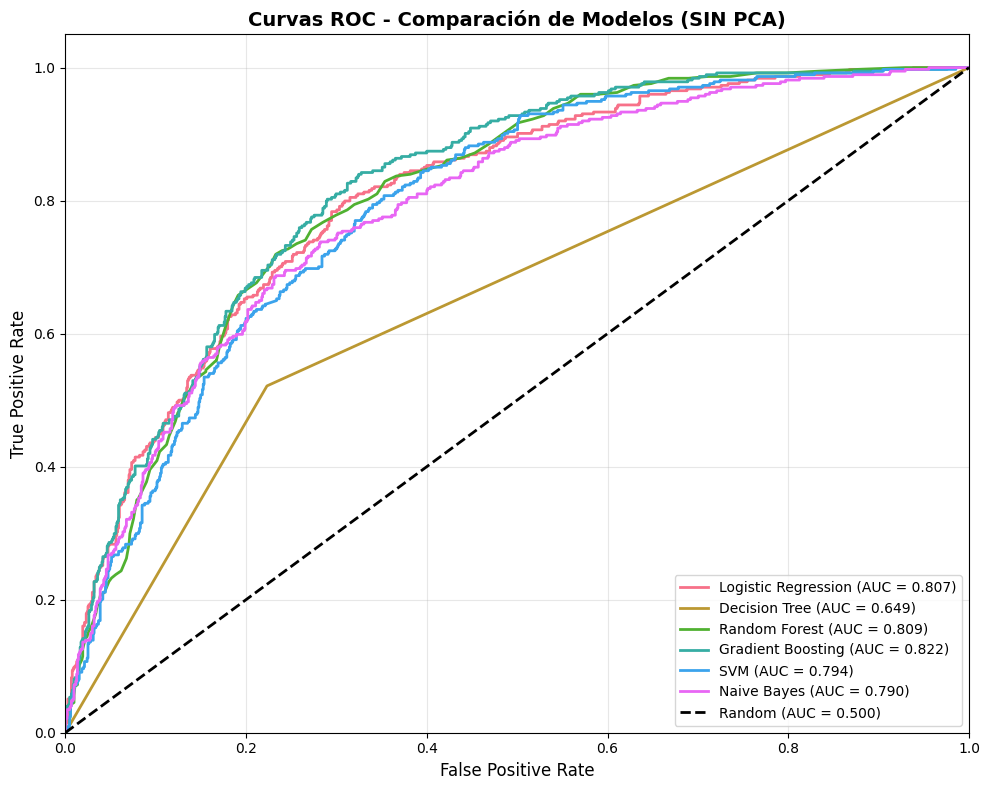

In [28]:
#Curvas ROC (SIN PCA)
# Graficar curvas ROC
plt.figure(figsize=(10, 8))

for name, results in results_without_pca.items():
    if results['Probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results['Probabilities'])
        roc_auc_val = results['ROC-AUC']
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_val:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos (SIN PCA)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

REDUCCIÓN DE DIMENSIONALIDAD - PCA

 Análisis de componentes principales:
    Dimensiones originales: 19
    Componentes para 95% varianza: 17


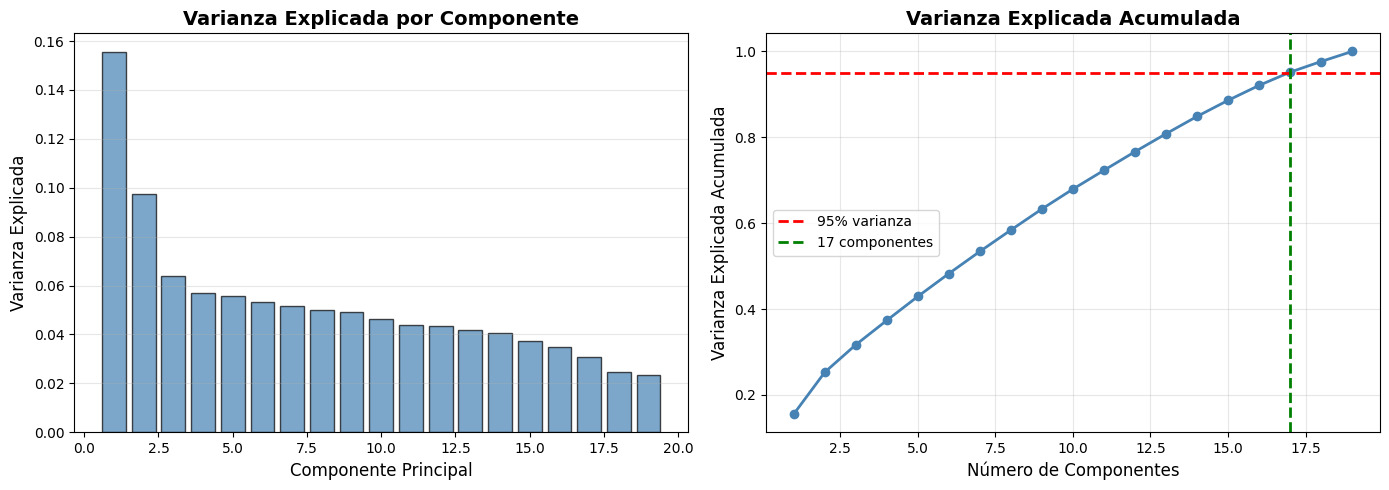


 Aplicando PCA con 17 componentes...

 PCA aplicado:
    Dimensiones originales: (8278, 19)
    Dimensiones reducidas: (8278, 17)
    Reducción: 10.5%
    Varianza retenida: 95.18%


In [29]:
#Aplicar PCA - Reduccion de Dimensionalidad
print("=" * 80)
print("REDUCCIÓN DE DIMENSIONALIDAD - PCA")
print("=" * 80)

# Determinar número óptimo de componentes
pca_full = PCA()
pca_full.fit(X_train_final)

# Varianza explicada acumulada
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Encontrar número de componentes para 95% de varianza
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
print(f"\n Análisis de componentes principales:")
print(f"    Dimensiones originales: {X_train_final.shape[1]}")
print(f"    Componentes para 95% varianza: {n_components_95}")

# Visualizar varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Varianza explicada por componente
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
            pca_full.explained_variance_ratio_, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Componente Principal', fontsize=12)
axes[0].set_ylabel('Varianza Explicada', fontsize=12)
axes[0].set_title('Varianza Explicada por Componente', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Varianza explicada acumulada
axes[1].plot(range(1, len(cumsum_variance) + 1), cumsum_variance,
             'o-', color='steelblue', linewidth=2, markersize=6)
axes[1].axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% varianza')
axes[1].axvline(x=n_components_95, color='g', linestyle='--', linewidth=2,
                label=f'{n_components_95} componentes')
axes[1].set_xlabel('Número de Componentes', fontsize=12)
axes[1].set_ylabel('Varianza Explicada Acumulada', fontsize=12)
axes[1].set_title('Varianza Explicada Acumulada', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Aplicar PCA con el número óptimo de componentes
print(f"\n Aplicando PCA con {n_components_95} componentes...")
pca = PCA(n_components=n_components_95, random_state=42)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_scaled)

print(f"\n PCA aplicado:")
print(f"    Dimensiones originales: {X_train_final.shape}")
print(f"    Dimensiones reducidas: {X_train_pca.shape}")
print(f"    Reducción: {(1 - n_components_95/X_train_final.shape[1])*100:.1f}%")
print(f"    Varianza retenida: {cumsum_variance[n_components_95-1]*100:.2f}%")

In [30]:
#Entrenamiento y Evaluacion de Modelos (CON PCA)
print("=" * 80)
print("ENTRENAMIENTO Y EVALUACIÓN - CON PCA")
print("=" * 80)

# Diccionario para almacenar resultados con PCA
results_with_pca = {}

# Re-entrenar todos los modelos con PCA
models_pca = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

for name, model in models_pca.items():
    print(f"\n{'='*60}")
    print(f" Entrenando: {name} (con PCA)")
    print(f"{'='*60}")

    # Entrenar modelo con datos PCA
    model.fit(X_train_pca, y_train_final)

    # Predicciones
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, 'predict_proba') else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Guardar resultados
    results_with_pca[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Model': model,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

    # Mostrar resultados
    print(f" Accuracy:  {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall:    {recall:.4f}")
    print(f" F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f" ROC-AUC:   {roc_auc:.4f}")

print("\n" + "="*80)
print(" TODOS LOS MODELOS ENTRENADOS (CON PCA)")
print("="*80)

ENTRENAMIENTO Y EVALUACIÓN - CON PCA

 Entrenando: Logistic Regression (con PCA)
 Accuracy:  0.7239
 Precision: 0.4865
 Recall:    0.7246
 F1-Score:  0.5822
 ROC-AUC:   0.7881

 Entrenando: Decision Tree (con PCA)
 Accuracy:  0.6643
 Precision: 0.3967
 Recall:    0.5080
 F1-Score:  0.4455
 ROC-AUC:   0.6144

 Entrenando: Random Forest (con PCA)
 Accuracy:  0.7495
 Precision: 0.5267
 Recall:    0.5535
 F1-Score:  0.5398
 ROC-AUC:   0.7869

 Entrenando: Gradient Boosting (con PCA)
 Accuracy:  0.7012
 Precision: 0.4580
 Recall:    0.6845
 F1-Score:  0.5488
 ROC-AUC:   0.7737

 Entrenando: SVM (con PCA)
 Accuracy:  0.7111
 Precision: 0.4694
 Recall:    0.6765
 F1-Score:  0.5542
 ROC-AUC:   0.7791

 Entrenando: Naive Bayes (con PCA)
 Accuracy:  0.7189
 Precision: 0.4792
 Recall:    0.6765
 F1-Score:  0.5610
 ROC-AUC:   0.7552

 TODOS LOS MODELOS ENTRENADOS (CON PCA)



 TABLA COMPARATIVA DE MODELOS (CON PCA)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.723918,0.486535,0.724599,0.582170,0.788071
Naive Bayes,0.718950,0.479167,0.676471,0.560976,0.755218
SVM,0.711143,0.469388,0.676471,0.554217,0.779084
Gradient Boosting,0.701207,0.457961,0.684492,0.548767,0.773659
Random Forest,0.749468,0.526718,0.553476,0.539765,0.786871
Decision Tree,0.664301,0.396660,0.508021,0.445487,0.614397


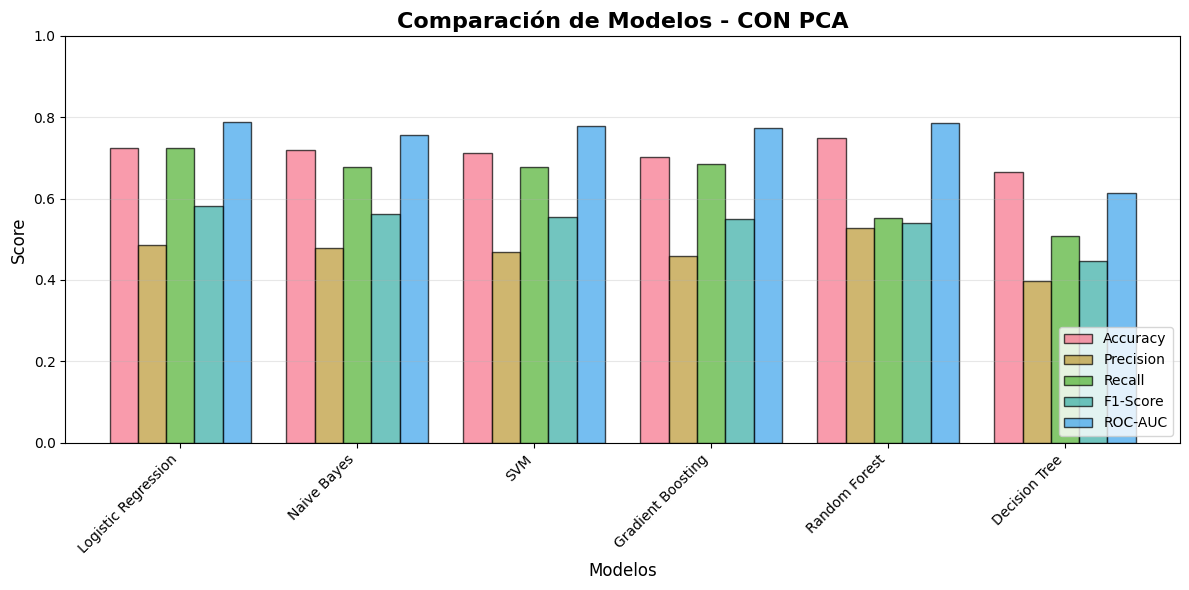

In [31]:
#Tabla Comparativa de Resultados (CON PCA)
#DataFrame con resultados con PCA
results_df_pca = pd.DataFrame(results_with_pca).T
results_df_pca = results_df_pca[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]
results_df_pca = results_df_pca.sort_values('F1-Score', ascending=False)

print("\n TABLA COMPARATIVA DE MODELOS (CON PCA)")
print("="*80)
display(results_df_pca.style.highlight_max(axis=0, props='background-color: lightgreen;'))

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
results_df_pca[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind='bar', ax=ax, width=0.8, edgecolor='black', alpha=0.7
)
ax.set_title('Comparación de Modelos - CON PCA', fontsize=16, fontweight='bold')
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Modelos', fontsize=12)
ax.set_ylim([0, 1])
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

COMPARACIÓN: SIN PCA vs CON PCA

 Comparación de F1-Score:


,Model,F1_Sin_PCA,F1_Con_PCA,Diferencia
0,Logistic Regression,0.59,0.58,-0.01
3,Gradient Boosting,0.58,0.55,-0.03
5,Naive Bayes,0.58,0.56,-0.02
4,SVM,0.57,0.55,-0.02
2,Random Forest,0.55,0.54,-0.01
1,Decision Tree,0.49,0.45,-0.04


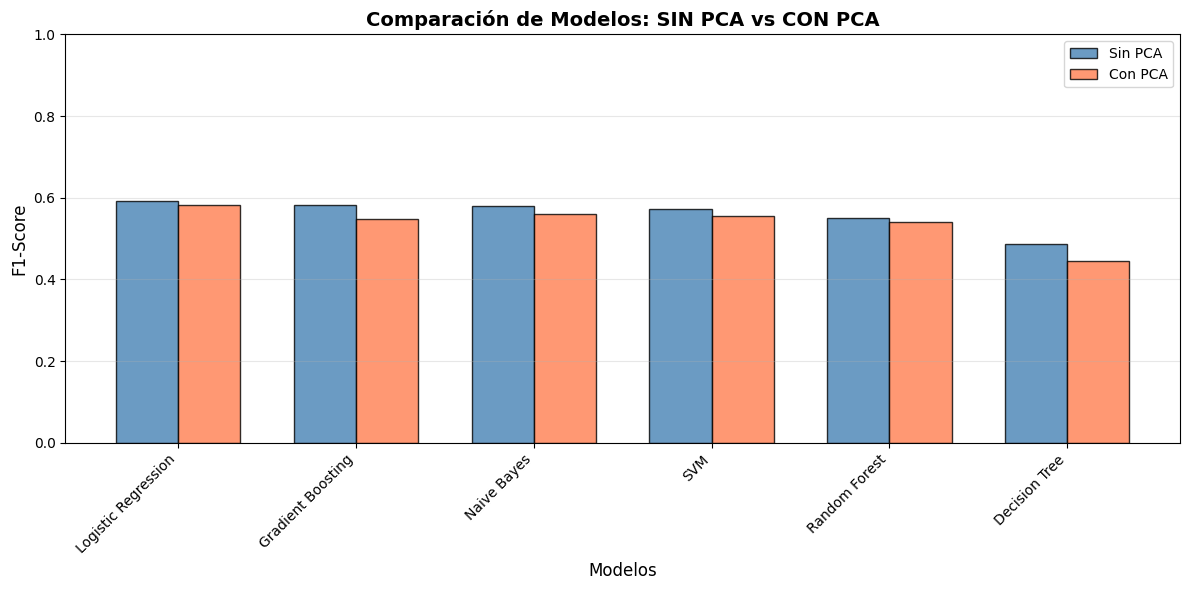


 Analisis del impacto de PCA:
    Modelos que mejoraron: 0
    Modelos que empeoraron: 6
    Cambio promedio: -0.0222


In [32]:
#Comparación SIN PCA vs CON PCA
print("=" * 80)
print("COMPARACIÓN: SIN PCA vs CON PCA")
print("=" * 80)

# Crear DataFrame comparativo
comparison_data = []

for model_name in models.keys():
    comparison_data.append({
        'Model': model_name,
        'F1_Sin_PCA': results_without_pca[model_name]['F1-Score'],
        'F1_Con_PCA': results_with_pca[model_name]['F1-Score'],
        'Diferencia': results_with_pca[model_name]['F1-Score'] - results_without_pca[model_name]['F1-Score']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1_Sin_PCA', ascending=False)

print("\n Comparación de F1-Score:")
display(comparison_df)

# Visualización comparativa
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['F1_Sin_PCA'], width,
               label='Sin PCA', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, comparison_df['F1_Con_PCA'], width,
               label='Con PCA', color='coral', alpha=0.8, edgecolor='black')

ax.set_xlabel('Modelos', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Comparación de Modelos: SIN PCA vs CON PCA', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Análisis de impacto de PCA
print("\n Analisis del impacto de PCA:")
mejora = (comparison_df['Diferencia'] > 0).sum()
empeora = (comparison_df['Diferencia'] < 0).sum()
print(f"    Modelos que mejoraron: {mejora}")
print(f"    Modelos que empeoraron: {empeora}")
print(f"    Cambio promedio: {comparison_df['Diferencia'].mean():.4f}")

In [33]:
#Seleccion del Mejor Modelo
print("=" * 80)
print("SELECCIÓN DEL MEJOR MODELO")
print("=" * 80)

# Encontrar el mejor modelo basado en F1-Score
best_model_no_pca = results_df_no_pca.index[0]
best_f1_no_pca = results_df_no_pca.loc[best_model_no_pca, 'F1-Score']

best_model_pca = results_df_pca.index[0]
best_f1_pca = results_df_pca.loc[best_model_pca, 'F1-Score']

print(f"\n MEJOR MODELO SIN PCA:")
print(f"    Modelo: {best_model_no_pca}")
print(f"    F1-Score: {best_f1_no_pca:.4f}")
print(f"\n Métricas completas:")
display(results_df_no_pca.loc[[best_model_no_pca]])

print(f"\n MEJOR MODELO CON PCA:")
print(f"    Modelo: {best_model_pca}")
print(f"    F1-Score: {best_f1_pca:.4f}")
print(f"\n Métricas completas:")
display(results_df_pca.loc[[best_model_pca]])

# Determinar el ganador general
if best_f1_no_pca > best_f1_pca:
    final_best = best_model_no_pca
    final_best_type = "SIN PCA"
    final_best_f1 = best_f1_no_pca
    final_best_results = results_without_pca[best_model_no_pca]
else:
    final_best = best_model_pca
    final_best_type = "CON PCA"
    final_best_f1 = best_f1_pca
    final_best_results = results_with_pca[best_model_pca]

print(f"\n" + "="*80)
print(f" MODELO GANADOR: {final_best} ({final_best_type})")
print(f"="*80)
print(f"\n Accuracy:  {final_best_results['Accuracy']:.4f}")
print(f" Precision: {final_best_results['Precision']:.4f}")
print(f" Recall:    {final_best_results['Recall']:.4f}")
print(f" F1-Score:  {final_best_results['F1-Score']:.4f}")
if final_best_results['ROC-AUC']:
    print(f" ROC-AUC:   {final_best_results['ROC-AUC']:.4f}")

SELECCIÓN DEL MEJOR MODELO

 MEJOR MODELO SIN PCA:
    Modelo: Logistic Regression
    F1-Score: 0.5916

 Métricas completas:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.72,0.49,0.75,0.59,0.81



 MEJOR MODELO CON PCA:
    Modelo: Logistic Regression
    F1-Score: 0.5822

 Métricas completas:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.72,0.49,0.72,0.58,0.79



 MODELO GANADOR: Logistic Regression (SIN PCA)

 Accuracy:  0.7246
 Precision: 0.4878
 Recall:    0.7513
 F1-Score:  0.5916
 ROC-AUC:   0.8073



 REPORTE DE CLASIFICACIÓN DEL MEJOR MODELO
              precision    recall  f1-score   support

    No Churn       0.89      0.71      0.79      1035
       Churn       0.49      0.75      0.59       374

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



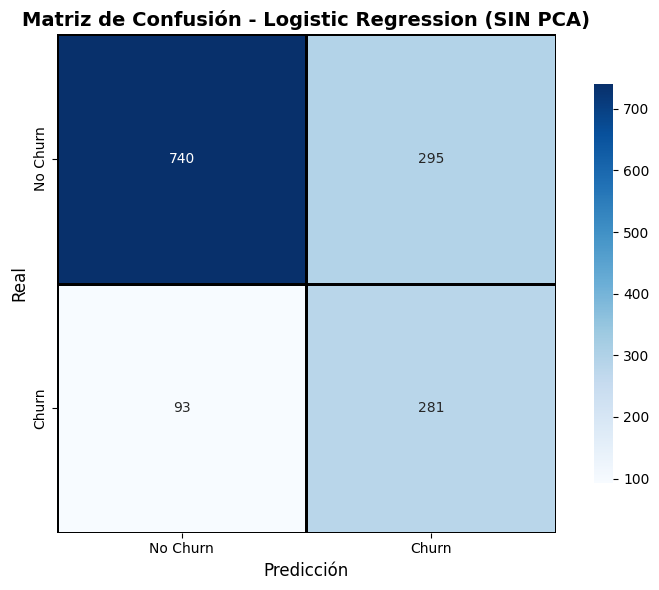


 Análisis detallado de la matriz de confusión:
    True Negatives (TN):  740
    False Positives (FP): 295
    False Negatives (FN): 93
    True Positives (TP):  281

  Specificity: 0.7150
    Sensitivity (Recall): 0.7513


In [34]:
#Reporte de Clasificacion del Mejor Modelo
print("\n REPORTE DE CLASIFICACIÓN DEL MEJOR MODELO")
print("="*80)
print(classification_report(y_test, final_best_results['Predictions'],
                          target_names=['No Churn', 'Churn']))

# Matriz de confusión del mejor modelo
cm = confusion_matrix(y_test, final_best_results['Predictions'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            linewidths=2, linecolor='black', cbar_kws={"shrink": 0.8})
plt.title(f'Matriz de Confusión - {final_best} ({final_best_type})',
          fontsize=14, fontweight='bold')
plt.ylabel('Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.xticks([0.5, 1.5], ['No Churn', 'Churn'])
plt.yticks([0.5, 1.5], ['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

# Calcular métricas adicionales de la matriz de confusión
tn, fp, fn, tp = cm.ravel()
print(f"\n Análisis detallado de la matriz de confusión:")
print(f"    True Negatives (TN):  {tn:,}")
print(f"    False Positives (FP): {fp:,}")
print(f"    False Negatives (FN): {fn:,}")
print(f"    True Positives (TP):  {tp:,}")
print(f"\n  Specificity: {tn/(tn+fp):.4f}")
print(f"    Sensitivity (Recall): {tp/(tp+fn):.4f}")

In [35]:
print("=" * 80)
print(" CONCLUSIONES DEL PIPELINE DE MACHINE LEARNING")
print("=" * 80)

# Formatear ROC-AUC correctamente
roc_auc_str = f"{final_best_results['ROC-AUC']:.4f}" if final_best_results['ROC-AUC'] else 'N/A'

# Calcular mejora de PCA
mejora = (comparison_df['Diferencia'] > 0).sum()
cambio_promedio = comparison_df['Diferencia'].mean()

# Clasificar precision y recall
precision_level = 'Alta' if final_best_results['Precision'] > 0.8 else 'Moderada' if final_best_results['Precision'] > 0.6 else 'Baja'
recall_level = 'Alto' if final_best_results['Recall'] > 0.8 else 'Moderado' if final_best_results['Recall'] > 0.6 else 'Bajo'

# Evaluar performance
performance_eval = 'logra' if final_best_f1 > 0.75 else 'tiene dificultad para'

# Conclusion sobre PCA
pca_conclusion = 'PCA mejora el rendimiento' if cambio_promedio > 0 else 'PCA reduce el rendimiento'

print(f"""
 RESUMEN DEL EXPERIMENTO:
    Modelos evaluados: {len(models)}
    Técnica de reducción: PCA ({n_components_95} componentes)
    Reducción de dimensionalidad: {(1 - n_components_95/X_train_final.shape[1])*100:.1f}%
    Dataset de prueba: {len(y_test):,} muestras

 MEJOR MODELO:
    Algoritmo: {final_best}
    Configuración: {final_best_type}
    F1-Score: {final_best_f1:.4f}
    Accuracy: {final_best_results['Accuracy']:.4f}
    ROC-AUC: {roc_auc_str}

 HALLAZGOS CLAVE:
   1. IMPACTO DE PCA:
       Modelos mejorados con PCA: {mejora}/{len(models)}
       Cambio promedio en F1-Score: {cambio_promedio:.4f}
       Conclusión: {pca_conclusion}

   2. PERFORMANCE DEL MODELO:
       El modelo {performance_eval} predecir churn efectivamente
       Precision: {final_best_results['Precision']:.4f} ({precision_level})
       Recall: {final_best_results['Recall']:.4f} ({recall_level})


""")

 CONCLUSIONES DEL PIPELINE DE MACHINE LEARNING

 RESUMEN DEL EXPERIMENTO:
    Modelos evaluados: 6
    Técnica de reducción: PCA (17 componentes)
    Reducción de dimensionalidad: 10.5%
    Dataset de prueba: 1,409 muestras

 MEJOR MODELO:
    Algoritmo: Logistic Regression
    Configuración: SIN PCA
    F1-Score: 0.5916
    Accuracy: 0.7246
    ROC-AUC: 0.8073

 HALLAZGOS CLAVE:
   1. IMPACTO DE PCA:
       Modelos mejorados con PCA: 0/6
       Cambio promedio en F1-Score: -0.0222
       Conclusión: PCA reduce el rendimiento

   2. PERFORMANCE DEL MODELO:
       El modelo tiene dificultad para predecir churn efectivamente
       Precision: 0.4878 (Baja)
       Recall: 0.7513 (Moderado)



